# ROC曲线

绘制每个类别的ROC曲线，计算AUC值。

同济子豪兄：https://space.bilibili.com/1900783

## 设置Matplotlib中文字体

In [1]:
# # windows操作系统
# plt.rcParams['font.sans-serif']=['SimHei']  # 用来正常显示中文标签 
# plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号

In [2]:
# Mac操作系统，参考 https://www.ngui.cc/51cto/show-727683.html
# 下载 simhei.ttf 字体文件
# !wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf

In [14]:
# Linux操作系统，例如 云GPU平台：https://featurize.cn/?s=d7ce99f842414bfcaea5662a97581bd1
# 如果遇到 SSL 相关报错，重新运行本代码块即可
!wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf -O /environment/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
!rm -rf /home/featurize/.cache/matplotlib

import matplotlib
matplotlib.rc("font",family='SimHei') # 中文字体


--2022-08-11 16:18:10--  https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf
Connecting to 172.16.0.13:5848... connected.
Proxy request sent, awaiting response... 200 OK
Length: 10050868 (9.6M) [application/x-font-ttf]
Saving to: ‘/environment/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf’

/environment/minico 100%[===================>]   9.58M  19.8MB/s    in 0.5s    

2022-08-11 16:18:11 (19.8 MB/s) - ‘/environment/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf’ saved [10050868/10050868]



## 导入工具包

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

## 载入类别名称和ID

In [2]:
idx_to_labels = np.load('idx_to_labels.npy', allow_pickle=True).item()
# 获得类别名称
classes = list(idx_to_labels.values())
print(classes)

['丝瓜', '人参果', '佛手瓜', '冬瓜', '南瓜', '哈密瓜', '木瓜', '甜瓜-伊丽莎白', '甜瓜-白', '甜瓜-绿', '甜瓜-金', '白兰瓜', '羊角蜜', '苦瓜', '西瓜', '西葫芦', '黄瓜']


## 载入测试集预测结果表格

In [3]:
df = pd.read_csv('测试集预测结果.csv')

In [4]:
df.head()

,图像路径,标注类别ID,标注类别名称,top-1-预测ID,top-1-预测名称,top-2-预测ID,top-2-预测名称,top-3-预测ID,top-3-预测名称,top-n预测正确,...,甜瓜-伊丽莎白-预测置信度,甜瓜-白-预测置信度,甜瓜-绿-预测置信度,甜瓜-金-预测置信度,白兰瓜-预测置信度,羊角蜜-预测置信度,苦瓜-预测置信度,西瓜-预测置信度,西葫芦-预测置信度,黄瓜-预测置信度
0,melon17_split/val/丝瓜/109.jpg,0,丝瓜,0.0,丝瓜,2.0,佛手瓜,12.0,羊角蜜,1.0,...,0.002193,0.014018,0.014891,0.003501,0.006260,0.092346,0.001454,0.003925,0.006661,0.001151
1,melon17_split/val/丝瓜/111.jpg,0,丝瓜,0.0,丝瓜,13.0,苦瓜,15.0,西葫芦,1.0,...,0.000567,0.000372,0.000705,0.002064,0.000421,0.072553,0.195918,0.000510,0.144077,0.048166
2,melon17_split/val/丝瓜/113.jpg,0,丝瓜,0.0,丝瓜,5.0,哈密瓜,11.0,白兰瓜,1.0,...,0.022293,0.033744,0.002499,0.009714,0.108798,0.044752,0.009132,0.011167,0.098024,0.035007
3,melon17_split/val/丝瓜/115.jpg,0,丝瓜,3.0,冬瓜,0.0,丝瓜,15.0,西葫芦,1.0,...,0.000888,0.003155,0.003725,0.001007,0.006776,0.002390,0.007951,0.001781,0.100773,0.006788
4,melon17_split/val/丝瓜/120.jpg,0,丝瓜,0.0,丝瓜,15.0,西葫芦,16.0,黄瓜,1.0,...,0.001660,0.000126,0.000372,0.003168,0.000812,0.015668,0.047193,0.000766,0.142601,0.080202


## 绘制某一类别的ROC曲线

In [24]:
specific_class = '西瓜'

In [25]:
y_test = list((df['标注类别名称'] == specific_class))

In [26]:
print(y_test)

[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False

In [27]:
y_score = list(df['西瓜-预测置信度'])

In [28]:
# print(y_score)

In [29]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, threshold = roc_curve(y_test, y_score)

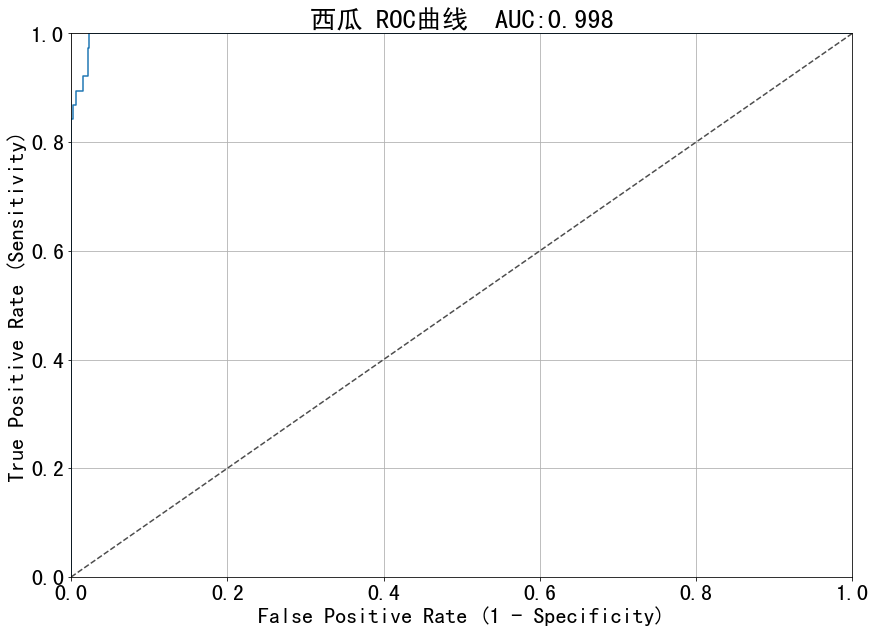

In [30]:
plt.figure(figsize=(14, 10))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1],ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 22
plt.title('{} ROC曲线  AUC:{:.3f}'.format(specific_class, auc(fpr, tpr)))
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.show()

In [31]:
auc(fpr, tpr)

0.9976533690915186

## 绘制所有类别的ROC曲线

丝瓜
人参果
佛手瓜
冬瓜
南瓜
哈密瓜
木瓜
甜瓜-伊丽莎白
甜瓜-白
甜瓜-绿
甜瓜-金
白兰瓜
羊角蜜
苦瓜
西瓜
西葫芦
黄瓜


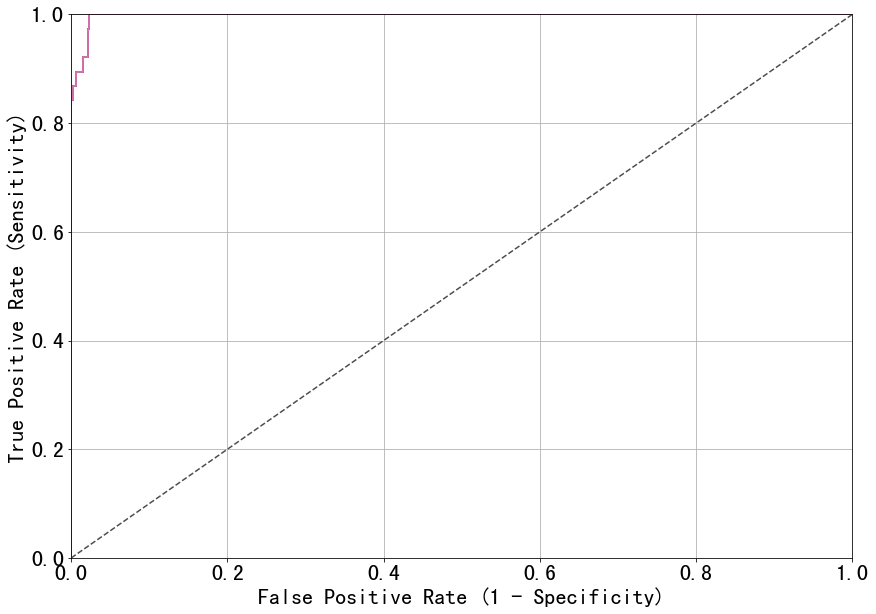

In [35]:
plt.figure(figsize=(14, 10))
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.plot([0, 1], [0, 1], ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 22

auc_list = []
for each_class in classes:
    print(each_class)
    y_test = list((df['标注类别名称'] == specific_class))
    y_score = list(df['西瓜-预测置信度'])
    fpr, tpr, threshold = roc_curve(y_test, y_score)
    plt.plot(fpr, tpr)
    plt.grid(True)
plt.show()

In [32]:
auc_list.append(np.mean(auc_list))
auc_list.append(np.mean(auc_list))

/home/featurize/work/.local/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/featurize/work/.local/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [179]:
df_report['AUC'] = auc_list

In [180]:
df_report

,precision,recall,f1-score,support,AUC
丝瓜,0.681818,0.810811,0.740741,37.0,0.378779
人参果,0.846154,0.916667,0.880000,36.0,0.575640
佛手瓜,0.961538,0.781250,0.862069,32.0,0.553263
冬瓜,0.740741,0.666667,0.701754,30.0,0.350800
南瓜,0.885714,0.861111,0.873239,36.0,0.489840
哈密瓜,0.795455,0.897436,0.843373,39.0,0.585325
木瓜,0.888889,0.842105,0.864865,38.0,0.632585
甜瓜-伊丽莎白,0.500000,0.444444,0.470588,18.0,0.213397
甜瓜-白,0.500000,0.647059,0.564103,17.0,0.319345
甜瓜-绿,0.571429,0.500000,0.533333,8.0,0.173403


In [6]:
df_report.to_csv('各类别准确率评估.csv', index=False)

NameError: name 'df_report' is not defined